<img src='msi_recruitment.gif'/>

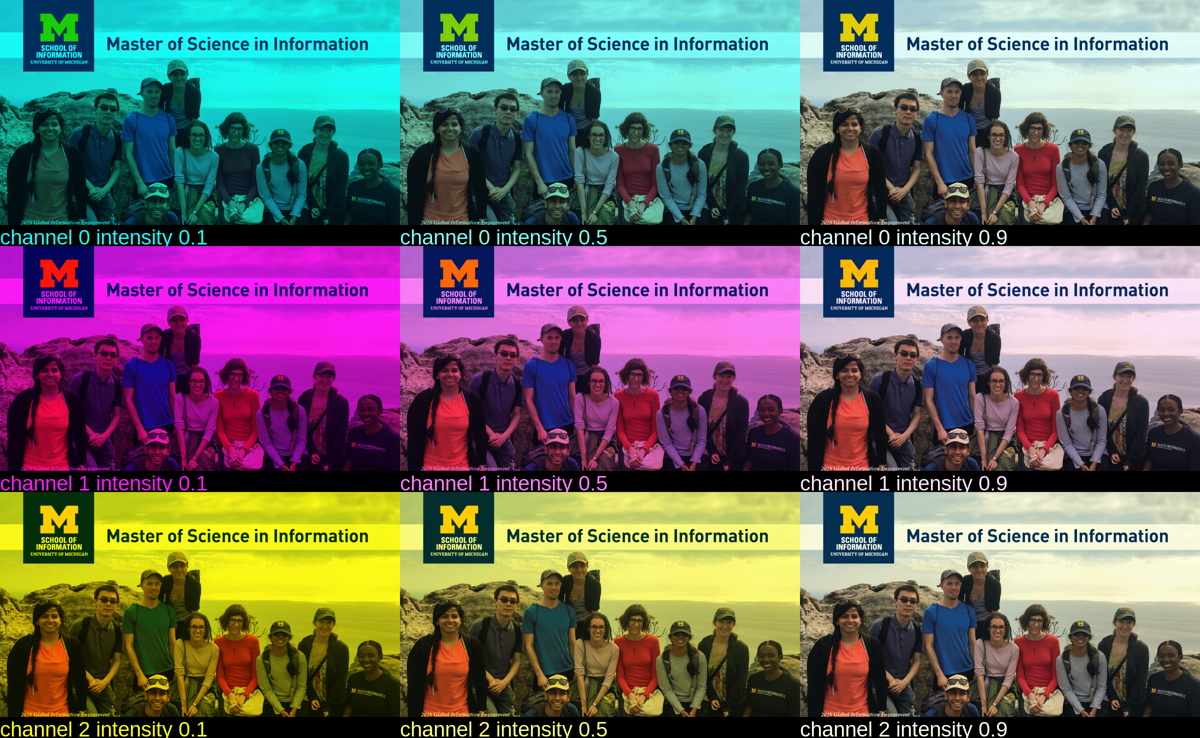

In [1]:
import PIL
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

FONT_SIZE = 42
FONT_NAME = "LiberationSans-Regular.ttf"
IMAGE_PATH = "msi_recruitment.gif"

def gen_img(channel, intensity):

    im = Image.open(IMAGE_PATH).convert('RGB')
    out = Image.new("RGB", (im.size[0], im.size[1] + FONT_SIZE), (0, 0, 0))
    out.paste(im, (0, 0))

    drw = ImageDraw.Draw(out)
    fnt = ImageFont.truetype(FONT_NAME, FONT_SIZE)
    text = "channel {} intensity {}".format(channel, intensity)
    drw.text((0, out.size[1] - FONT_SIZE), text, font=fnt, fill=(255,255,255))

    rgb = list(out.split())
    rgb[channel] = rgb[channel].point(lambda i: i*intensity)
    out = Image.merge('RGB', rgb)
    
    return out

images = []

for channel in [0, 1, 2]:
    for intensity in [0.1, 0.5, 0.9]:
        images.append(gen_img(channel, intensity))

x, y = 0, 0
first = images[0]
size = (first.width*3, first.height*3)
sheet = PIL.Image.new(first.mode, size)

for im in images:
    sheet.paste(im, (x, y))
    if x + first.width == sheet.width:
        x, y = 0, y + first.height
    else:
        x = x + first.width

display(sheet.resize((int(sheet.width / 2), int(sheet.height / 2))))